Data Visualizations are ways we represent statistical information using visually appealing representations that can be understood easily. In this lesson we will be using the Matplotlib and Seaborn packages.

We will focus on univariate visualizations: bar charts, and histograms.
- Bar charts for qualitative variables, e.g, the amount (number) of eggs consumed in a meal (categories: {breakfast, lunch, or dinner}). In general, bar chart maps categories to numbers.
- Pie charts: A pie chart is preferably used when the number of categories is less, and you'd like to see the proportion of each category.
- Create histograms for quantitative variables. A histogram splits the (tabular) data into evenly sized intervals and displays the count of rows in each interval with bars. A histogram is similar to a bar chart, except that the "category" here is a range of values.

It is expected that your data is organized in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

- each variable is a column
- each observation is a row
- each type of observational unit is a table

## Bar Charts

A bar chart depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

We will be using the pokemon.csv dataset. It is located in the `data/` dir.

#### Bar Chart using 
A basic bar chart of frequencies can be created through the use of seaborn's countplot function.


`seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)`

#### Example 1. Create a vertical bar chart using Seaborn, with default colors

In [161]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

(807, 14)
   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  pois

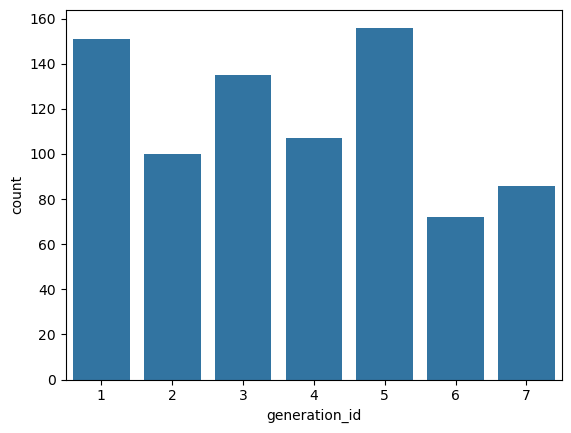

In [78]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('data/pokemon.csv')
print(pokomon.shape)
print(pokomon.head(10))

# A semicolon (;) at the end of the statement will supress printing the plotting information
sns.countplot(data=pokemon, x='generation_id');

To make this more visually appealing, we use the color from seaborn color palette.
There are 10 different colors in the color palette. Since we have 7 generations, grabbing the first 7 colors will make a lot of sense.
With this, we also set `hue='generation_id'` and `legend=False`, since it will not be needed.
The hue splits the bars by `generation_id` so each bar will have a distinct color

#### Example 2. Create a vertical bar chart using Seaborn, with multi color

In [85]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

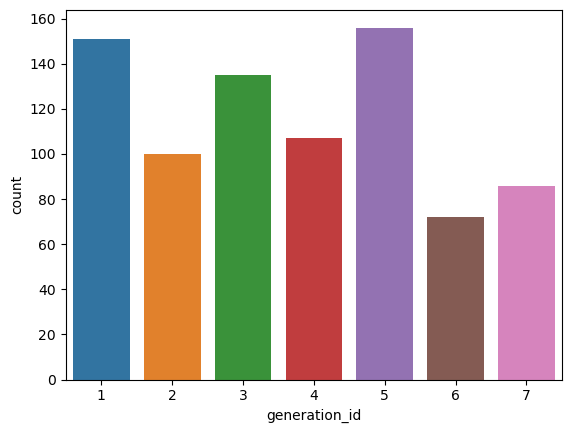

In [82]:
base_color = sns.color_palette()[:7]
sns.countplot(data=pokomon, x='generation_id', hue='generation_id', palette=base_color, legend=False);

## Bar Chart using the Matplotlib

You can even create a similar bar chart using the Matplotlib, instead of Seaborn. We will use the [matplotlib.pyplot.bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) function to plot the chart. The syntax is:

matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

Refer to the documentation for the details of optional arguments. In the example below, we will use [Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to extract a Series from the given DataFrame object.

#### Example 3. Create a vertical bar chart using Matplotlib, with a uniform single color

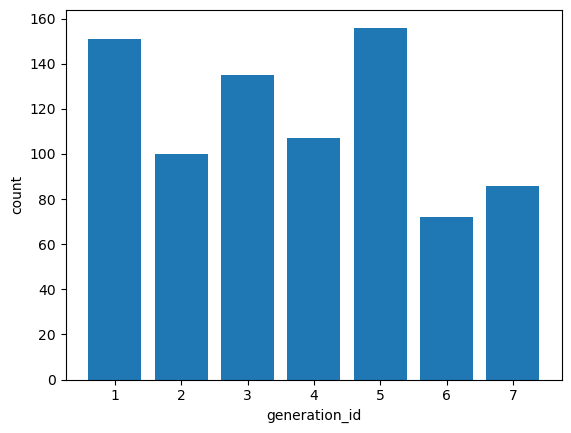

In [108]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()


There is a lot more you can do with both Seaborn and Matplotlib bar charts. The remaining examples will experiment with seaborn's `countplot()` function.

For nominal-type data, one common operation is to sort the data in terms of frequency. In the examples shown above, you can even order the bars as desirable. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

This can be done by using the `order` argument of the `countplot()` function.

#### Example 4. Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

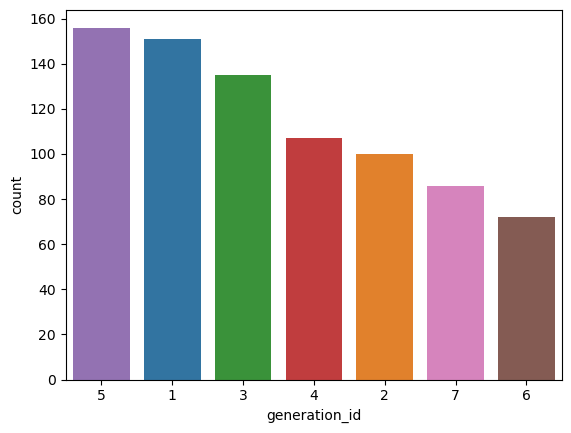

In [134]:
# Static-ordering the bars
order = [5,1,3,4,2,7,6]
sns.countplot(data=pokemon, x='generation_id', hue='generation_id', palette=base_color, order=order, legend=False);



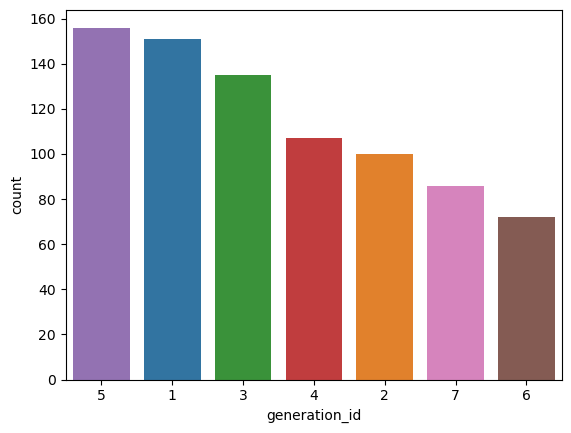

In [140]:
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series

freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=pokemon, x='generation_id', hue='generation_id', palette=base_color, order=gen_order, legend=False);

While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables. The best thing for us to do in this case is to convert the column into an ordered categorical data type.

`Additional Variation - Refer to the CategoricalDtype(opens in a new tab) to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.`

Should you find that you need to sort an ordered categorical type in a different order, you can always temporarily override the data type by setting the "order" parameter as above.

The category labels in the examples above are very small. In case the category labels have large names, you can make use of the `matplotlib.pyplot.xticks(rotation=90)` function, which will rotate the category labels (not axes) counter-clockwise 90 degrees.

#### Example 5. Rotate the category labels (not axes)

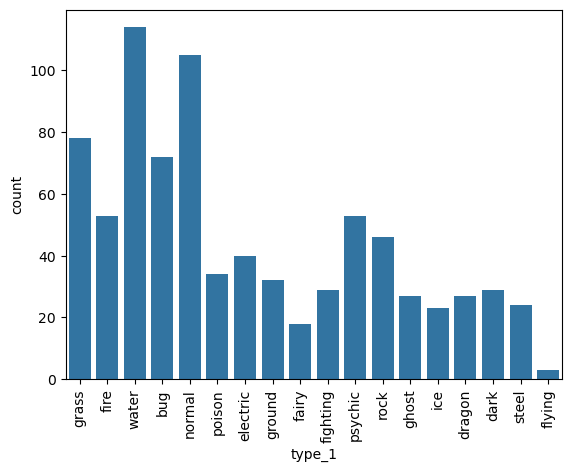

In [151]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=pokemon, x='type_1');

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

Even after using the matplotlib.pyplot.xticks(rotation=90) function, if the category labels do not fit well, you can rotate the axes.

#### Example 6. Rotate the axes clockwise

In [159]:
type_order

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object', name='type_1')

/var/folders/p6/y9pkgvcj6j3fmm51hklfqjtw0000gn/T/ipykernel_68805/2070277099.py:3: UserWarning: 
The palette list has fewer values (7) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=pokemon, y='type_1', palette=base_color, hue='type_1', legend=False, order=type_order);


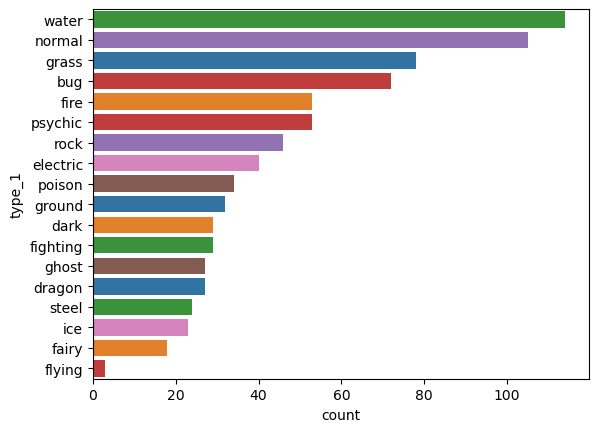

In [157]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', palette=base_color, hue='type_1', legend=False, order=type_order);